In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from skimage.io import imread
from skimage import img_as_float
import matplotlib.pyplot as plt
import pylab

%matplotlib inline

In [2]:
# переменная image содержbn изображение в виде numpy-массива размера n * m * 3, 
# где n и m соответствуют размерам изображения, а 3 соответствует формату представления RGB.
image = imread('C:/Users/1/Data/parrots.jpg')

In [3]:
image.shape

(474, 713, 3)

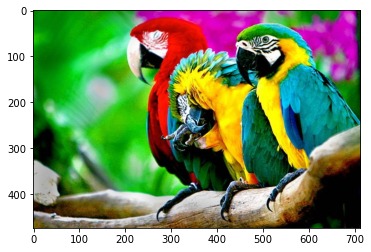

In [4]:
pylab.imshow(image)

In [5]:
# Преобразование изображения - все значения приводятся в интервал от 0 до 1
transform_image = img_as_float(image)

In [6]:
transform_image.shape

(474, 713, 3)

In [7]:
# матрица объекты-признаки - каждый пиксель характеризуется тремя координатами - значениями интенсивности в пространстве RGB
X = transform_image.reshape(474*713, 3)

In [8]:
# исходное изображение приведем к такой же форме и сделаем DataFrame
image_df = pd.DataFrame(image.reshape(474*713, 3), columns = ['R', 'G', 'B'])

In [9]:
image_df.head()

,R,G,B
0,4,126,5
1,3,125,4
2,2,126,2
3,2,126,2
4,2,128,3


In [10]:
def PSNR(image, image2):
    # максимальное значение, принимаемое пикселем изображения
    MAX = 255
    # среднеквадратичная ошибка
    MSE = np.sum((image - image2)**2) / (474 * 713 *3) 
    psnr = 20 * np.log10(MAX) - 10 * np.log10(MSE)
    return psnr

In [11]:
def fill_mean(df):
    # проходим по каждому кластеру
    for label in df['Label'].unique():
        # находим среднее значение по каждому кластеру
        mean_color = df.loc[df['Label'] == label].mean()
        # заполняем пиксели одного кластера средним значением
        df.loc[df['Label'] == label, 'R'] = int(mean_color[0])
        df.loc[df['Label'] == label, 'G'] = int(mean_color[1])
        df.loc[df['Label'] == label, 'B'] = int(mean_color[2])
    # убираем label, получаем значения из дата-фрейма и преобразуем матрицу к размерам изображения
    image_mean = df.drop(['Label'], axis = 1).values.reshape(474, 713, 3)
    return image_mean

In [12]:
def fill_median(df):
    for label in df['Label'].unique():
        median_color = df.loc[df['Label'] == label].median()
        df.loc[df['Label'] == label, 'R'] = int(median_color[0])
        df.loc[df['Label'] == label, 'G'] = int(median_color[1])
        df.loc[df['Label'] == label, 'B'] = int(median_color[2])
    image_median = df.drop(['Label'], axis = 1).values.reshape(474, 713, 3)
    return image_median

number of clusters:  2
psnr_mean =  12.11170223058808
psnr_median =  11.686231990442337
number of clusters:  3
psnr_mean =  13.175566066094525
psnr_median =  12.797040962057586
number of clusters:  4
psnr_mean =  14.39367019621399
psnr_median =  14.04642122768611
number of clusters:  5
psnr_mean =  15.557140411571702
psnr_median =  15.149622616952925
number of clusters:  6
psnr_mean =  16.572250341499462
psnr_median =  16.073164350227508
number of clusters:  7
psnr_mean =  17.670174792526318
psnr_median =  17.372372398670677
number of clusters:  8
psnr_mean =  18.466354068265858
psnr_median =  18.175411416257
number of clusters:  9
psnr_mean =  19.143775896238996
psnr_median =  18.85077577126134
number of clusters:  10
psnr_mean =  19.673168495124983
psnr_median =  19.446077430964827
number of clusters:  11
psnr_mean =  20.16129975732121
psnr_median =  19.884542041127737
number of clusters:  12
psnr_mean =  20.631628491052062
psnr_median =  20.342566020603194
number of clusters:  13
ps

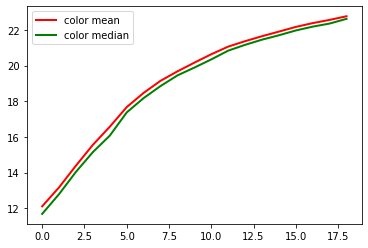

In [13]:
results = [[], []]
for n in range(2, 21):
    
    # обучаем kmeans
    kmeans = KMeans(n_clusters = n, 
                    init = 'k-means++', 
                    random_state = 241).fit(X)
    image_df['Label'] = kmeans.labels_
    
    # создаем копии дата-фрейма
    image_df_mean = image_df.copy()
    image_df_median = image_df.copy()
    
    # заполнение средними значениями 
    image_mean = fill_mean(image_df_mean) 
    psnr_mean = PSNR(image, image_mean)
    
    # заполнение медианным значением
    image_median = fill_median(image_df_median)
    psnr_median = PSNR(image, image_median)
    
    results[0].append(psnr_mean)
    results[1].append(psnr_median)

    print('number of clusters: ', n)
    print('psnr_mean = ', psnr_mean)
    print('psnr_median = ', psnr_median)

plt.figure()
plt.plot(results[0], 'r', linewidth=2)
plt.plot(results[1], 'g', linewidth=2)
plt.legend(['color mean', 'color median'])

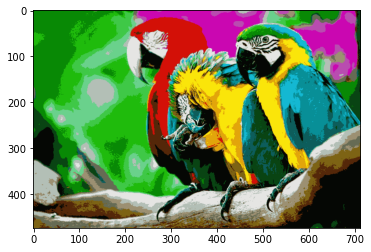

In [14]:
pylab.imshow(image_mean)

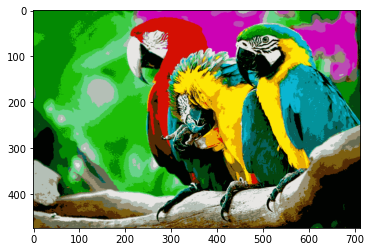

In [15]:
pylab.imshow(image_median)

In [16]:
for i in range(len(results[0])):
    if results[0][i] > 20 or results[1][i] > 20:
        print(f'PSNR достигает требуемого значения при {i + 2} кластерах')
        break

PSNR достигает требуемого значения при 11 кластерах
